<a href="https://colab.research.google.com/github/Rogerio-mack/MDJ/blob/main/EADMDJ_A4_Visualizacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<h1 align=left><font size = 5, style="color:rgb(0,0,0)"> EAD <b>Mineração de Dados para Jogos </b> </font></h1>

<h1 align=left><font size = 6, style="color:rgb(200,0,0)">A4 Visualização dos Dados</font></h1>
<hr>



Nesta primeira parte você tem uma introdução sobre a importância da **Visualização de Dados**. À seguir você verá os **principais recursos do Python** para gerar esses gráficos empregando as bibliotecas `matplotlib` e `seaborn`. Ao final, como nas demais aulas, você encontra os **exercícios resolvidos e propostos**.

# Introdução
---

Existem ao menos dois tipos de visualização de dados. Uma primeira é voltada para você explore dados e faça descobertas como padrões, relações e processos em ação sobre os dados. Um outro tipo de visualização fornece ilustrações informativas, claras e visualmente atraentes de seus resultados, que podem ser apresentados a outras pessoas ou incluídos em uma publicação.

Ambos os tipos de visualização podem ser feitos com `Python`, assim como em outras linguagens e ferramentas. Nossa opção pelo uso de `Python` é sua ampla popularidade, a adoção em um grande número de cursos de graduação e o uso nas mais diversas áreas como Ciências da Computação, Engenharias, Biologia e Ciências da Saúde. 

A **Visualização de Dados**, entretanto, envolve um série de questões de como fazer descobertas sobre os dados ou apresentar informações, que vão muito além da linguagem ou ferramentas empregadas. Neste texto introdutório, você irá aprender como empregar corretamente gráficos para responder questões relevantes sobre os dados, ao mesmo tempo que aprenderá a construir representações gráficas úteis dos dados com `Python`. Essas duas trilhas de apresentação serão desenvolvidas com o estudo de casos com dados de diferentes áreas como Finanças, Comércio, Saúde, Ciência e Tecnologia, e você pode seguir apenas pela trilha das questões de Visualização de Dados caso não queira se aprofundar no uso da linguagem `Python`.


ATENÇÃO: ALGUNS COMANDOS NESTE NOTEBOOK, APENAS NESSA PARTE INICIAL, NÃO PODEM SER EXECUTADOS POIS FOI EDITADO PARA SERVIR DE MATERIAL DE APOIO.

# Importância da Visualização de Dados


---




O **Quarteto de Anscombe** (F.J. Anscombe, 1973) talvez seja o exemplo mais conhecido que ilustra o valor da visualização dos dados mesmo diante de várias informações que podemos obter, como variáveis estatísticas dos dados. Ele é formado de quatro conjuntos de dados que aparentam ser idênticos quando descritos por técnicas de estatística descritiva como a média e a variância, mas que são muito distintos quando exibidos graficamente. 

Os quatro conjuntos de dados exibidos abaixo, pares $(x,y)$, apresentam com até 3 casas decimais as mesmas médias e variâncias de $x$ e $y$ e correlação de 0.816, levando todos a uma mesma regressão linear.

$y = 3 + 0.5 x$

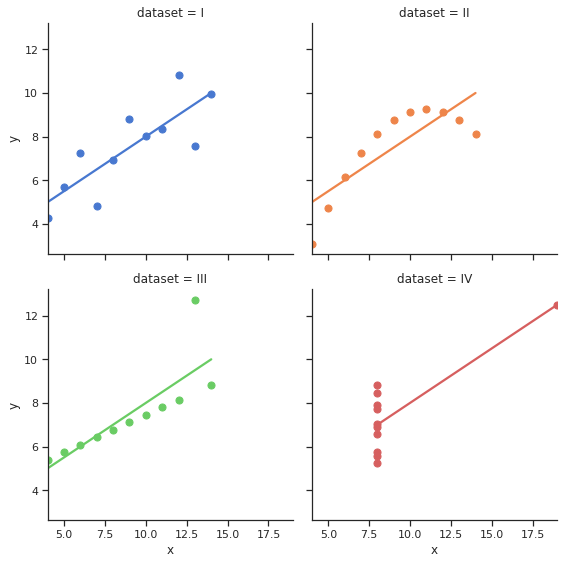

In [ ]:
import seaborn as sns
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})
plt.show()

Esse exemplo simples mostra a importância da Visualização de Dados na descoberta de relações entre os dados que dificilmente poderíamos identificar de outro modo.

Um exemplo mais elaborado pode ser dado pelo gráfico abaixo.  

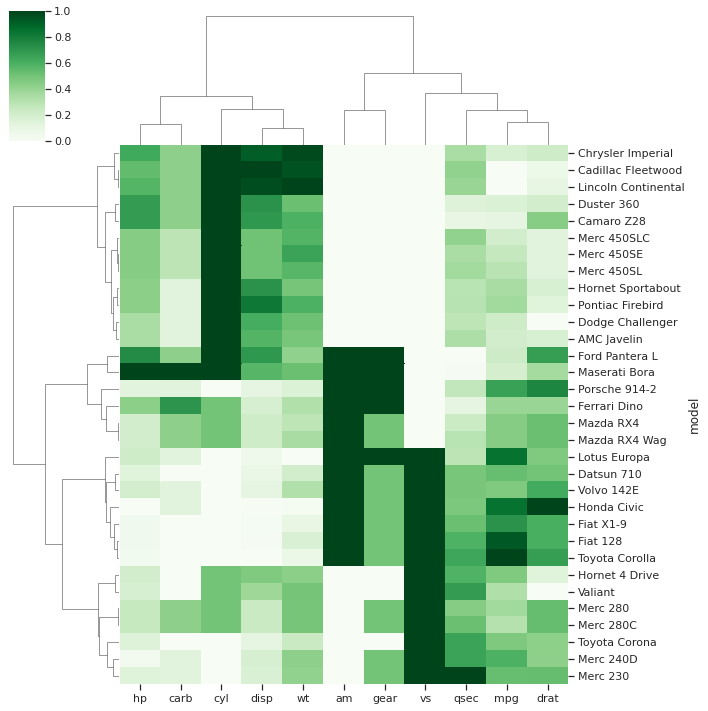

In [ ]:
# Libraries
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
 
# Data set
url = 'https://python-graph-gallery.com/wp-content/uploads/mtcars.csv'
df = pd.read_csv(url)
df = df.set_index('model')
# del df.index.name
df
 
sns.clustermap(df, metric="euclidean", standard_scale=1, method="ward", cmap="Greens")
plt.show()


Esse gráfico, conhecido como *Mapa de Calor* (ou *Heat Map*), não só serve para a descoberta de relações sobre os dados, como ilustra como o conjunto  encontra-se dividido de acordo com características dos veículos (`hp`, `mpg` etc.) em dois grupos distintos. Ele apresenta a informação de um modo que mesmo um leigo poderá compreender a relação existente e, dificilmente, poderíamos apresentar essa informação de modo claro que não uma forma visual. 

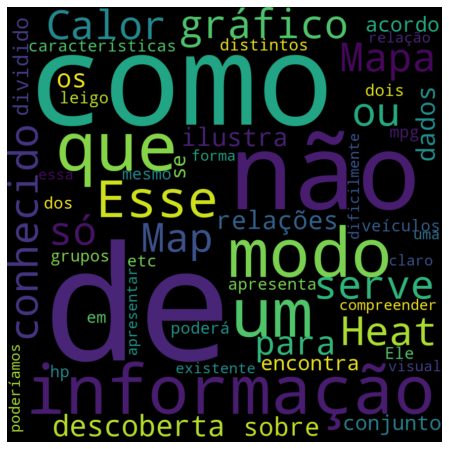

In [ ]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))

# Create a list of word
text = 'Esse gráfico, conhecido como *Mapa de Calor* (ou *Heat Map*), não só serve para a descoberta de relações sobre os dados, como ilustra como o conjunto  encontra-se dividido de acordo com características dos veículos (`hp`, `mpg` etc.) em dois grupos distintos. Ele apresenta a informação de um modo que mesmo um leigo poderá compreender a relação existente e, dificilmente, poderíamos apresentar essa informação de modo claro que não uma forma visual. '

# Create the wordcloud object
wordcloud = WordCloud(width=880, height=880, margin=0).generate(text)
 
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


O gráfico acima é conhecido como `Word Cloud` e é bastante popular na Web. Seu propósito? Identificar de modo fácil as maiores ocorrências de têrmos. Isso tem uma aplicação muito grande em negócios se você imaginar por exemplo esse gráfico sobre o texto das reclamações de clientes, ou sobre um catálogo de produtos, permitindo identificar facilmente as ocorrências mais comuns.

# Fazendo Perguntas Relevantes sobre os Dados 



---



Agora que entendemos a importância da Visualização dos Dados precisamos entender quais as perguntas que podemos fazer sobre os dados e que quais gráficos devemos empregar para essas perguntas. Boa parte desse livro se dedica a entrar em detalhes sobre essas perguntas e que gráficos empregar em cada caso. 

As perguntas que podemos fazer sobre os dados podem ser agrupadas em algumas categorias relevantes, cada uma delas tendo gráficos mais adequados para você obter e apresentar respostas à sua questão:

> **Evolução** (ou *Tendência dos Dados*): gráficos de linha, área, séries múltiplas

> **Distribuição**: histogramas, gráficos de distribuição de densidade, *boxplot*

> ***Ranking***: gráficos de barras, *word cloud*, *spider*, *pie chart*

> **Correlação**: gráficos de dispersão, *heat map*, *density 2D* 

> **Partes de um todo**: *Tree map*, diagramas Venn

Havendo ainda gráficos especializados que envolvem para análises geográficas (*maps*) ou fluxo de dados em redes sociais. 

Para os nossos propósitos será suficiente tratarmos apenas as categorias acima e dedicaremos, cada um dos capítulos seguintes, à solução de casos envolvendo cada uma das categorias de questões.

Mas antes de nos aprofundarmos, vamos ver alguns exemplos dessas questões e como obtemos respostas gráficas à elas.



# Evolução
--- 

Muitos dados apresentam uma evolução ao longo tempo. Nesses casos, frequentemente queremos saber sobre a tendência dessa evolução, sobre a probabilidade de se alcançar um valor ou ainda comparar a forma de evolução de variáveis que possam ter alguma relação. 

Quando essas variáveis são numéricas um gráfico de linhas é frequentemente usado para visualizar a tendência nos dados em intervalos de tempo e responder essas perguntas. 

> **Estudo de Caso 1:** Você possui dados recentes do índice da Bolsa, do dólar e do valor de ações de duas grandes empresas (Petrobrás e Vale). Você está interessado em saber se as ações das empresas têm uma evolução relacionada a mecanismos próprios da empresa ou do setor (como uma reorganização da empresa ou um aumento da demanda de aço no mercado) ou segue uma tendência geral do mercado? 



Os dados que você possui são exibidos a seguir.     

In [ ]:
mystocksn = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/mystocksn.csv')
mystocksn.head(10)

,data,IBOV,VALE3,PETR4,DOLAR
0,2020-01-02,118573.0,13.45,16.270000,4.0163
1,2020-01-03,117707.0,13.29,15.990000,4.0234
2,2020-01-06,116878.0,13.14,16.219999,4.0570
3,2020-01-07,116662.0,13.23,16.059999,4.0604
4,2020-01-08,116247.0,13.22,15.700000,4.0662
5,2020-01-09,115947.0,12.99,15.750000,4.0628
6,2020-01-10,115503.0,12.97,15.640000,4.0921
7,2020-01-13,117325.0,13.32,15.480000,4.0705
8,2020-01-14,117632.0,13.45,15.370000,4.1458
9,2020-01-15,116414.0,13.26,14.870000,4.1313


E talvez você queira empregar um gráfico de linhas como abaixo para identificar que tanto o índice da bolsa, como as ações das duas empresas, seguem uma evolução bastante semelhantes indicando que os valores tem uma causa comum para a sua evolução (no caso o mercado externo) e não apresenta uma causa própria de cada empresa ou setor (como uma greve do Petroleiros ou um acidente ambiental em uma jazida de minério).




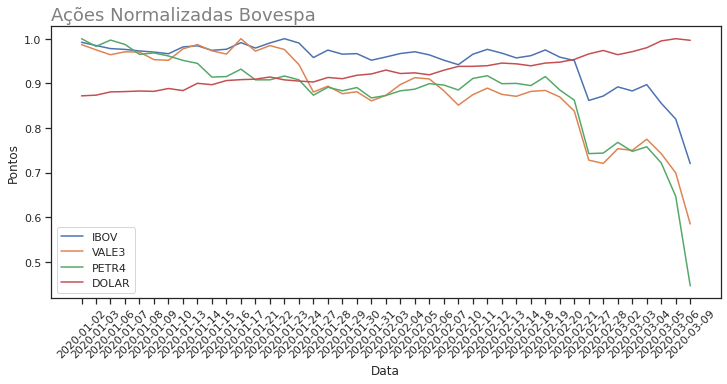

In [ ]:
mystocksn_norm = mystocksn
plt.figure(figsize=(12,5))

for item in ['IBOV','VALE3','PETR4','DOLAR']:
  mystocksn_norm[item] = mystocksn[item]/mystocksn[item].max() 
  sns.lineplot(x='data',y=item,data=mystocksn_norm,label=item)

# Add legend
plt.legend(loc=3, ncol=1)
 
# Add titles
plt.title("Ações Normalizadas Bovespa", loc='left', fontsize=18, fontweight=0, color='gray')
plt.xlabel("Data")
plt.ylabel("Pontos")

plt.xticks(rotation=45)
plt.show()

### Normalizando os Dados

Mas antes de chegar nesse resultado você terá de aprender, além da escolha apropriada do gráfico para exibir esses resultados, como preparar os dados para exibir informações corretas. O 'mesmo' gráfico acima pode será bastante pouco informativo se não tivessemos feito uma **normalização** dos dados antes. Como o IBOV é um valor alguns milhares os demais valores, da ordem de dezenas as linhas, apareceriam uma única linha em que não seria possível de se distinguir os valores. 

# Distribuição  
---
Os dados a seguir foram obtidos da **WHO World Health Organization** - Life expectancy and Healthy life expecancy. Eles apresentam indicadores de saúde de diversos países como o índice de massa corpórea médio da população (BMI), a expectativa de vida e índices de mortalidade. Uma pergunta relevante sobre a saúde global poderia ser sobre a distribuição de certos índices entre os países, como por exemplo o caso a seguir. 

> **Caso 2:** Como se distribuem os valores de BMI e a Expectativa de Vida média dos indivíduos entre os diferentes países Países? 



Os dados da WHO são os seguintes.

In [ ]:
WHO = pd.read_csv('https://meusite.mackenzie.br/rogerio/TIC/Life_Expectancy_Data.csv')
WHO.rename(columns={' BMI ':'BMI', 'Life expectancy ':'Life_expectancy'}, inplace=True)

WHO2010 = WHO[WHO['Year'] == 2010]
WHO2010.reset_index(inplace=True)
WHO2010 = WHO2010.drop(columns='index')

WHO.head()

,Country,Year,Status,Life_expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## Histograma 

Em muitos casos é muito mais importante você conhecer a distribuição de valores de uma variável que unicamente sua estatística descritiva (média, variância etc.). O histograma é um gráfico de distribuição e ele envolve os valores de uma única variável e sua frequência (quantidade de ocorrências) para esses valores.  

A série de dados de BMI completa e somente para o ano de 2010 mostram uma ***distribuição bimodal*** desses valores indicando haverem claramente grupos distintos de países de acordo com o índice médio de massa corpórea de seus habitantes. 

No handles with labels found to put in legend.


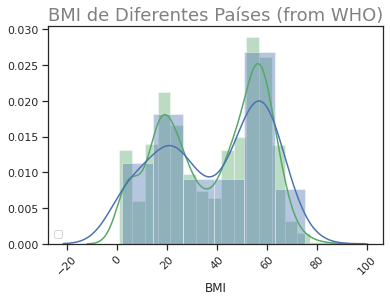

In [ ]:
sns.distplot(WHO.BMI, color="g")
sns.distplot(WHO2010.BMI, color="b")

# Add legend
plt.legend(loc=3, ncol=1)
 
# Add titles
plt.title("BMI de Diferentes Países (from WHO)", loc='left', fontsize=18, fontweight=0, color='gray')
# plt.xlabel("Data")
# plt.ylabel("Pontos")

plt.xticks(rotation=45)
plt.show()

Já a Expectativa de Vida não apresenta a mesma distribuição, ela é uma  **Distribuição em Calda à Esquerda**. 


No handles with labels found to put in legend.


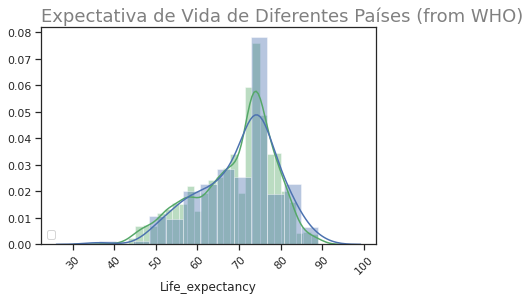

In [ ]:
sns.distplot(WHO.Life_expectancy, kde=True, color="g")
sns.distplot(WHO2010.Life_expectancy, kde=True, color="b")

# Add legend
plt.legend(loc=3, ncol=1)
 
# Add titles
plt.title("Expectativa de Vida de Diferentes Países (from WHO)", loc='left', fontsize=18, fontweight=0, color='gray')
# plt.xlabel("Data")
# plt.ylabel("Pontos")

plt.xticks(rotation=45)
plt.show()



O que você pode concluir desses gráficos? Embora os bases em termos de índice de massa corpórea estejam dividos em dois grupos distintos, em termos de expectativa de vida você pode observar para expectativas de vida menores (menores que 75 anos) um espectro muito maior de valores típico de situações de desigualdade e, muito provalvemente refletindo, uma desigualdade social entre os países. 

Mas isso não é representado no gráfico e teria de ser verificado com o emprego de outros dados como o produto interno de cada país (presente nos dados da WHO) ou a renda média. Isso é algo que poderemos observar em vários casos que trateremos ao longo deste texto: *a cada análise novas hipóteses podem ser levantadas requerendo novos dados*, o que é um aspecto básico do método científico. Não é sem motivo portanto que denominamos modernamente, essas e outras análise de dados, pelo termo comum de **Ciências de Dados**.     

# Correlação 
---

Relações entre os dados são muitas vezes a parte mais importante dentre as descobertas que buscamos nos dados. Essas relações em geral são denominadas de modo geral como correlações. Mas é importante notar que a correlação estatística tem um significado muito mais específico e, em geral, está associada a **correlação linear**. Graficamente, entretanto, estamos livres para buscar quaisquer relações entre os dados, sejam elas lineares ou não. 

> **Caso 3**: Alguma característica torna um **Pokemon** mais apto a vencer as batalhas? 

Embora possa parecer um conjunto de dados de brinquedo esses são dados reais dos jogos Pokemon compartilham características com uma série de problemas bastante concretos. Cada uma das características (atributos) de Pokemons são  **features** do mesmo modo que teríamos features de produtos, clientes ou equipamentos. Do mesmo modo, podemos estar interessados no 'melhor' Pokemon ou sua melhor característica, poderíamos também buscar os melhores produtos, clientes ou suas características, ou ainda os equipamentos mais sujeitos a falha (apenas invertendo a medida de melhor para $1/x$).  

Gráficos de dispersão, dentre outros que veremos, são normalmente empregados para descoberta dessas relações.

O conjunto de dados de Pokemons tem a seguinte estrutura.

In [ ]:
pokemon = pd.read_csv('https://meusite.mackenzie.br/rogerio/TIC/Pokemon.csv',index_col=0)
pokemon.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Gráficos múltiplos são bastante empregados para descobrir relações nos dados. Como não sabemos que relações existem, a ideia é buscar variáveis candidatas e então aprofundar a análise sobre elas. Gráficos como o `pairplot` estão presentes em várias linguagens e ferramentas para visualização e permitem exibir simultaneamente vários **Gráficos de Dispersão** de pares de variáveis e buscarmos relações de interesse.




<Figure size 288x144 with 0 Axes>

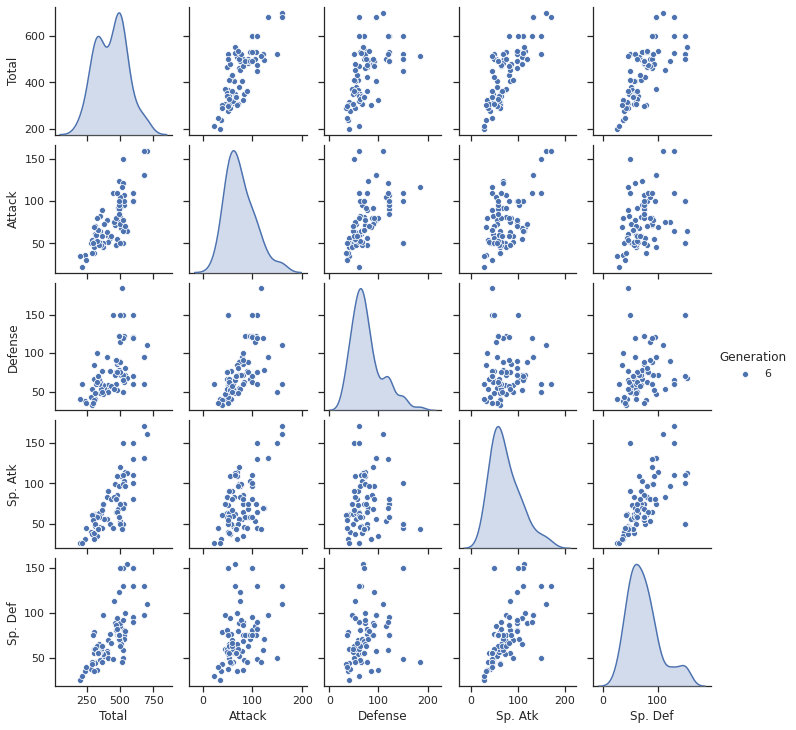

In [ ]:
# sns.scatterplot(x='Attack', y='Defense', data=pokemon)
plt.figure(figsize=(4,2))
sns.pairplot(data=pokemon[pokemon.Generation == 6][['Generation', 'Total', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def' ]],hue='Generation',aspect=1, height=2)

plt.show()


Este é um exemplo pequeno, mesmo assim restrigimos os dados a apenas um tipo de Pokemon de interesse. Se você já jogou Pokemon deve saber que é um jogo bastante simples e que ao final, o valor Total é em geral reponsável pela vitória do Pokemon. Desse modo, dentro da pergunta inicial de buscar características que tornam um Pokemon mais apto à vitória, podemos perguntar?

*Quais pares de variáveis apresentam correlação (relação linear) maior?* 

Não, não é evidente, mas isso é bastante próximo do que encontramos em casos reais (e este é um caso real!). Correlações claramente lineares, por exemplo acima de 0.9, são fatos bastante raros de serem encontrados. Mas considerando problemas complexos em que várias variáveis interpendem, encontrar relações lineares de 0.6 ou 0.7 são bastante relevantes.

Se você respondeu 'Sp. Atk' (*Speed Attack*) à pergunta anterior você acertou. Como mostra a linha de regressão abaixo 'Total' e 'Sp. Atk.' têm uma correlação linear de 0.79!


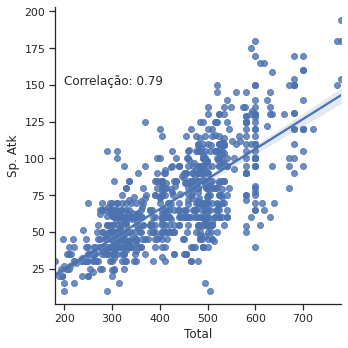

In [ ]:
sns.lmplot(x='Total',y='Sp. Atk',data=pokemon)

plt.text(200,150,'Correlação: '+ str( round(pokemon[pokemon.Generation == 6].Total.corr(pokemon[pokemon.Generation == 6]['Sp. Atk']),2)  ))
plt.show()

Embora tenhamos tratado de relações lineares Gráficos de Dispersão permitem exibir exibir quaisquer outras relações que existam entre os dados. 

Dados, por exemplo, na forma $y=x^2$ podem exibir $corr(x,y) = 0$ e entretanto exibem uma *relação* direta e a visualização dos dados é fundamental para descoberta de relações como essas. 

# Sumário dessa parte inicial
---


Entendemos aqui a importância da **Visualização dos Dados** para encontrarmos padrões, relações e processos em ação sobre os dados que de outra forma dificilmente poderíamos encontrar. Ela tem também um aspecto importante na comunicação dos resultados.

O domínio de linguagens e ferramentas como o `Python` para visualização dos dados são um aspecto importante para que você obtenha resultados na Visualização de Dados. Mas mais importante que esse aspecto técnico é o aspecto do *pensamento analítico*. Você deve antes entender que tipo de perguntas são de interesse sobre dados (evolução, distribuição, *ranking*,  correlações ou partes de um todo) e como você visualizar respostas a essas questões. Esse *pensamento analítico também deve seguir o princípios da ciência em que, a cada análise, seguem-se novas hipóteses a serem analisadas em um processo de refinamento sucessivo. 





# Referências
---


**Data Visualization: A Practical Introduction** (2019)
by Kieran Healy

**Making Data Visual: A Practical Guide to Using Visualization for Insight** (2017) 
by Danyel Fisher, Miriah Meyer 

**The Visual Display of Quantitative Information Hardcover** (2001)
by Edward R. Tufte 

**Fundamentals of Data Visualization: A Primer on Making Informative and Compelling Figures** (2019)  
by Claus O. Wilke 

**Storytelling with Data: A Data Visualization Guide for Business Professionals Paperback** (2015)
by Cole Nussbaumer Knaflic

**Python Data Visualization: An Easy Introduction to Data Visualization in Python with Matplotlip, Pandas, and Seaborn** (2019) 
by Samuel Burns 


<h1 align=left><font size = 6, style="color:rgb(200,0,0)">Visualização dos Dados: Essencial com Python</font></h1>
<hr>

# Recursos

> https://www.data-to-viz.com/

> https://matplotlib.org/ <br>
> https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf <br>

> https://seaborn.pydata.org/ <br>
> https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf <br>





# Basic imports

Adicionamos agora aos imports que já vimos os imports das duas bibliotecas mais empregadas para visualização em Python, o `matplotlib` e o `seaborn`.  

In [ ]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
# %matplotlib inline
get_ipython().run_line_magic('matplotlib', 'inline')

import seaborn as sns

# opcional
mpl.style.use(['seaborn']) # tente ggplot e seaborn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Kit de Sobrevivência

Um kit de instruções mínimas para obter gráficos em Python. Esse já é um bom começo e, obtidos esses gráficos você pode então refinar os seus resultados com seleções de dados de interesse (muito importante), títulos, formatos etc.

# **Evolução:** Gráficos de linha, `plot(x,y)`

Gráficos (x,y) nem sempre geram linhas!

    align choice  time  coherence  firing_rate
394  sacc     T1  -600        0.0    45.232512
395  sacc     T1  -580        0.0    45.426403
396  sacc     T1  -560        0.0    43.071647
397  sacc     T1  -560        3.2    44.633471
398  sacc     T1  -540        0.0    45.479431


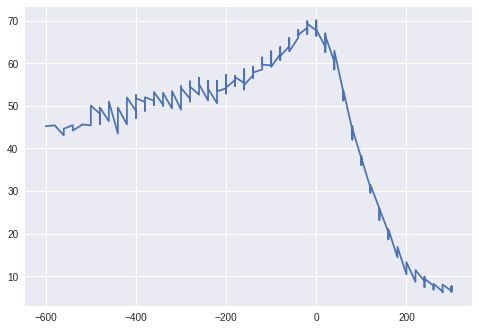

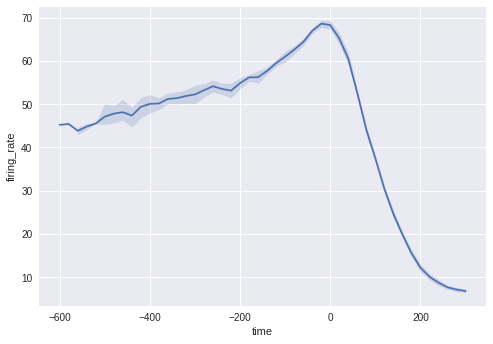

In [ ]:
df = sns.load_dataset('dots')
df = df[(df.choice == 'T1') & (df['align'] != 'dots')]
print(df.head())

plt.plot(df.time, df.firing_rate)
plt.show()

sns.lineplot(df.time, df.firing_rate)
plt.show()

# **Distribuição:** Histogramas, `hist(x)` 

Outros gráficos também são usados para análise de distribuição, como `boxplot` e `violinplot`, mas este é apenas o Kit de sobrevivência.

   total  speeding  alcohol  ...  ins_premium  ins_losses  abbrev
0   18.8     7.332    5.640  ...       784.55      145.08      AL
1   18.1     7.421    4.525  ...      1053.48      133.93      AK
2   18.6     6.510    5.208  ...       899.47      110.35      AZ
3   22.4     4.032    5.824  ...       827.34      142.39      AR
4   12.0     4.200    3.360  ...       878.41      165.63      CA

[5 rows x 8 columns]


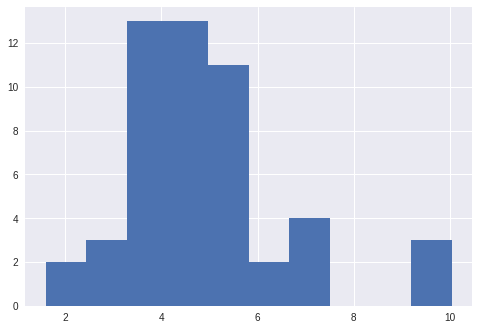

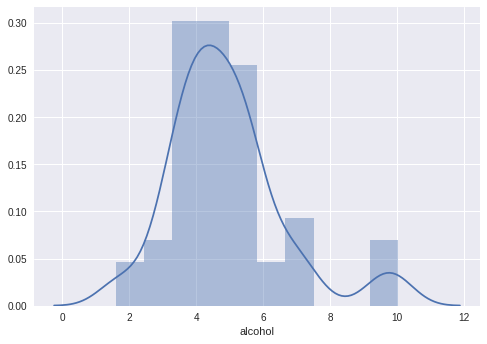

In [ ]:
df = sns.load_dataset('car_crashes')
print(df.head())

plt.hist(df.alcohol)
plt.show()

sns.distplot(df.alcohol)
plt.show()

# **Ranking:** Barplots, `barplot(x,y)`  

Outros gráficos também são usados para isso, como `pie`. Você ainda poderia argumentar que gráficos de linhas podem ser usados para isso (como também poderíamos empregar `barplots` para verificar a tendência dos dados), o importante é que você entenda que existe um uso mais adequado de cada gráfico e que, em muitos casos, isso pode depender do problema e quem empregará a visualização.

    mpg  cylinders  displacement  ...  model_year  origin                       name
0  18.0          8         307.0  ...          70     usa  chevrolet chevelle malibu
1  15.0          8         350.0  ...          70     usa          buick skylark 320
2  18.0          8         318.0  ...          70     usa         plymouth satellite
3  16.0          8         304.0  ...          70     usa              amc rebel sst
4  17.0          8         302.0  ...          70     usa                ford torino

[5 rows x 9 columns]


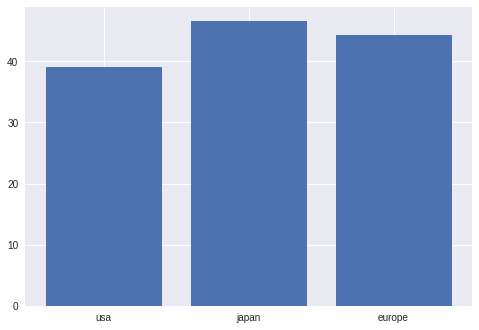

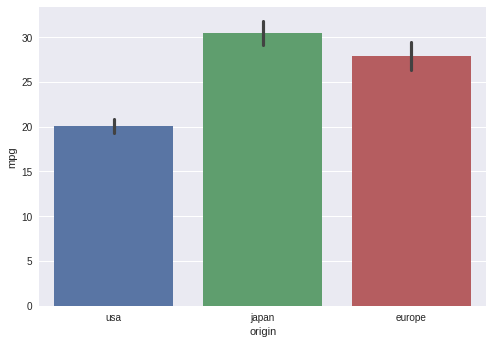

In [ ]:
df = sns.load_dataset('mpg')
print(df.head())

plt.bar(df.origin, df.mpg) 
plt.show()

sns.barplot(df.origin, df.mpg)
plt.show()

# **Correlação:** Dispersão, `scatter(x,y)`  

Vários gráficos podem ser usados aqui também e veremos alguns deles mais adiante. Note que um gráfico `scatter(x,y)` será 'igual' a um gráfico de linha `plot(x,y)` se existir um função $y=f(x)$. Mas são bastante incomuns esses casos em Ciência de Dados. Apesar disso, buscar uma 'correlação' dos dados, é exatamente buscar uma função (padrão) entre eles.

   total  speeding  alcohol  ...  ins_premium  ins_losses  abbrev
0   18.8     7.332    5.640  ...       784.55      145.08      AL
1   18.1     7.421    4.525  ...      1053.48      133.93      AK
2   18.6     6.510    5.208  ...       899.47      110.35      AZ
3   22.4     4.032    5.824  ...       827.34      142.39      AR
4   12.0     4.200    3.360  ...       878.41      165.63      CA

[5 rows x 8 columns]


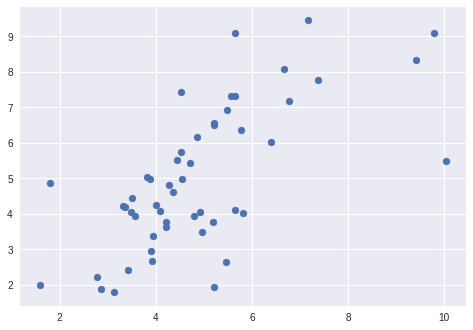

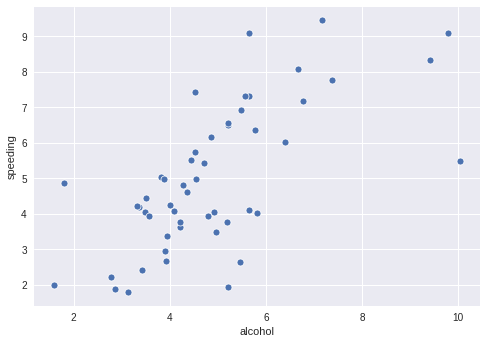

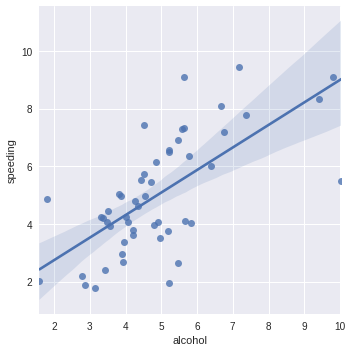

In [ ]:
df = sns.load_dataset('car_crashes')
print(df.head())

plt.scatter(df.alcohol,df.speeding)
plt.show()

sns.scatterplot(df.alcohol,df.speeding)
sns.lmplot('alcohol','speeding',data=df)
plt.show()

## **Caso 1 EVOLUÇÃO:** A recente Variação das Ações das empresas Petrobrás e Vale está relacionada a fatores internos das companhias ou externos? 

Os dados de Fechamento diário das ações, dólar e índice Bovespa, são obtidos à partir do **Yahoo Finance**.

**Aprenda** Gráficos de Linha, a comparar Séries e a Linha de Tendência dos Dados

## Obtenção e Preparação dos Dados 
### SKIP se você estiver estudando apenas a Visualização de Dados

Esse código mostra como os dados foram obtidos e preparados para você. O código, como exemplo, pode ser útil para seu projeto e a exploração e entendimento de outros dados. Mas se estiver apenas estudando a Visualização de Dados pule esta parte.    

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from pandas_datareader import data
tickers = ['^BVSP','BRL=X','PBR','VALE']
start_date = '2020-01-01'
end_date = '2020-03-09'

panel_data = data.DataReader(tickers, 'yahoo', start_date, end_date)

mystocks = pd.DataFrame()

mystocks = panel_data[[('Close', '^BVSP'),('Close', 'VALE'),('Close', 'PBR'),('Volume', '^BVSP'),('Volume', 'VALE'),('Volume', 'PBR'),('Close','BRL=X')]]
mystocks.columns = ['IBOV','VALE3','PETR4','IBOV_V','VALE3_V','PETR4_V','DOLAR']

mystocks['data'] = panel_data.index
mystocks['ano'] = mystocks['data'].apply(lambda x: x.strftime('%Y'))
mystocks['mes'] = mystocks['data'].apply(lambda x: x.strftime('%m'))
mystocks['dia'] = mystocks['data'].apply(lambda x: x.strftime('%d'))
# mystocks = pd.concat([mystocks, mystocks_], axis=1 )

mystocks = mystocks.dropna()
mystocks.reset_index(inplace=True)

mystocksn = pd.concat([mystocks['data'],mystocks[['IBOV','VALE3','PETR4','DOLAR']]],axis=1)
mystocksn_vol = pd.concat([mystocks['data'],mystocks[['IBOV','VALE3','PETR4','IBOV_V','VALE3_V','PETR4_V','DOLAR']]],axis=1)

mystocksn.head()
mystocksn
mystocksn.to_csv('mystocksn.csv',index = False)

In [ ]:
mystocks2 = pd.melt(mystocks[['IBOV','VALE3','PETR4','IBOV_V','VALE3_V','PETR4_V','DOLAR']])
mystocks2.columns= ['Stock','value']  

mystocksd = pd.DataFrame()
for i in ['IBOV','VALE3','PETR4','IBOV_V','VALE3_V','PETR4_V','DOLAR']:
  mystocksd = pd.concat([mystocksd,mystocks.Date])

mystocksd.columns= ['Date']
mystocksd.reset_index(inplace=True)
mystocks2 = pd.concat([mystocksd.Date,mystocks2], axis=1)

mystocks2['data'] = mystocks2['Date']
mystocks2['ano'] = mystocks2['Date'].apply(lambda x: x.strftime('%Y'))
mystocks2['mes'] = mystocks2['Date'].apply(lambda x: x.strftime('%m'))
mystocks2['dia'] = mystocks2['Date'].apply(lambda x: x.strftime('%d'))

mystocksb_vol = pd.concat([mystocks2['data'],mystocks2[['Stock','value']]],axis=1)
mystocksb = mystocksb_vol[mystocksb_vol['Stock'].isin(['IBOV','VALE3','PETR4','DOLAR'])]

mystocksb
mystocksb.to_csv('mystocksb.csv',index = False)


## Explorando os Dados 

Entenda um pouco dos dados que vamos empregar antes de progredir.     

In [ ]:
mystocksn = pd.read_csv('mystocksn.csv')
mystocksn.head(10)

,data,IBOV,VALE3,PETR4,DOLAR
0,2020-01-02,118573.0,13.45,16.270000,4.0163
1,2020-01-03,117707.0,13.29,15.990000,4.0234
2,2020-01-06,116878.0,13.14,16.219999,4.0570
3,2020-01-07,116662.0,13.23,16.059999,4.0604
4,2020-01-08,116247.0,13.22,15.700000,4.0662
5,2020-01-09,115947.0,12.99,15.750000,4.0628
6,2020-01-10,115503.0,12.97,15.640000,4.0921
7,2020-01-13,117325.0,13.32,15.480000,4.0705
8,2020-01-14,117632.0,13.45,15.370000,4.1458
9,2020-01-15,116414.0,13.26,14.870000,4.1313


In [ ]:
mystocksb = pd.read_csv('mystocksb.csv')
mystocksb.head(100)

,data,Stock,value
0,2020-01-02,IBOV,118573.00
1,2020-01-03,IBOV,117707.00
2,2020-01-06,IBOV,116878.00
3,2020-01-07,IBOV,116662.00
4,2020-01-08,IBOV,116247.00
...,...,...,...
95,2020-01-15,PETR4,14.87
96,2020-01-16,PETR4,14.89
97,2020-01-17,PETR4,15.16
98,2020-01-21,PETR4,14.77


## Line Plots: Evolução

Um gráfico de linhas ou gráfico de linhas exibe a evolução de uma ou várias variáveis numéricas. Os pontos de dados são conectados por segmentos de linha reta. É semelhante a um gráfico de dispersão, exceto que os pontos de medição são ordenados (geralmente pelo valor do eixo x) e unidos a segmentos de linha reta.

Um gráfico de linhas é **frequentemente usado para visualizar uma tendência nos dados em intervalos de tempo** - uma série temporal -, portanto, a linha é frequentemente desenhada cronologicamente.



### `plt.plot(x,y,data=data)`
Plotando uma série de *dados*

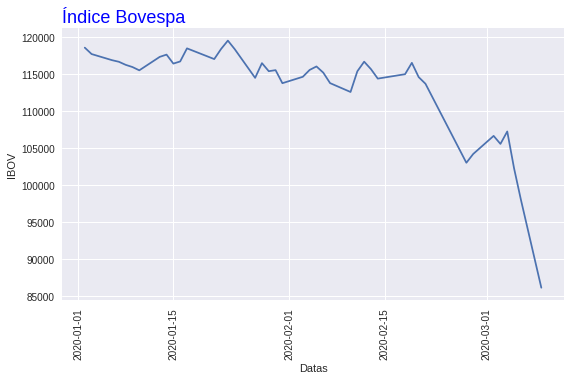

In [ ]:
f = plt.figure(figsize=(9,5))                 # setando o tamanho de uma figura

plt.title('Índice Bovespa', loc='left', fontsize=18, fontweight=0, color='blue')  # título

plt.plot('data','IBOV',data=mystocksn)        # plot

plt.xlabel('Datas')                           # x,y labels
plt.ylabel('IBOV')

plt.xticks(rotation=90)                       # só para ajustar os labels
plt.show()                                    # exibe

### sns.lineplot(x,y,data=data), Comparando Séries
Plotando mais de uma série de dados. 

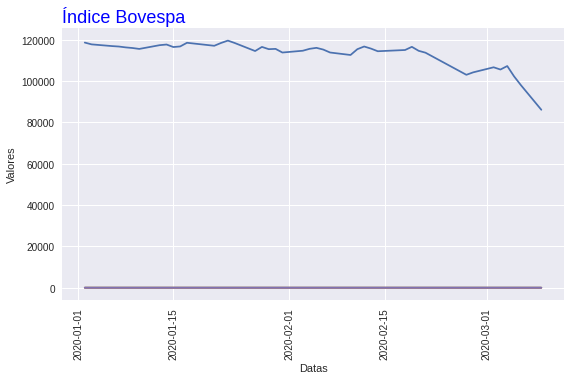

In [ ]:
f = plt.figure(figsize=(9,5))                 # setando o tamanho de uma figura

sns.lineplot(x='data',y='IBOV',data=mystocksn)
sns.lineplot(x='data',y='PETR4',data=mystocksn)
sns.lineplot(x='data',y='VALE3',data=mystocksn)
sns.lineplot(x='data',y='DOLAR',data=mystocksn)

plt.title('Valores Bovespa', loc='left', fontsize=18, fontweight=0, color='blue')  # título

plt.xlabel('Datas')                           # x,y labels
plt.ylabel('Valores')

plt.xticks(rotation=90)                       # só para ajustar os labels
plt.show()                                    # exibe


### Ooops! **Normalizando os Dados**


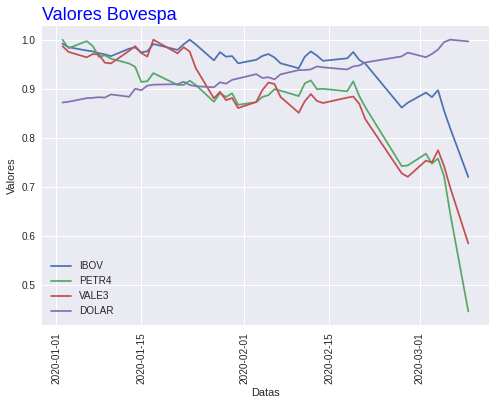

In [ ]:
mystocksn['IBOV'] = mystocksn['IBOV']/mystocksn['IBOV'].max() 
mystocksn['PETR4'] = mystocksn['PETR4']/mystocksn['PETR4'].max() 
mystocksn['VALE3'] = mystocksn['VALE3']/mystocksn['VALE3'].max() 
mystocksn['DOLAR'] = mystocksn['DOLAR']/mystocksn['DOLAR'].max() 

sns.lineplot(x='data',y='IBOV',data=mystocksn,label='IBOV')
sns.lineplot(x='data',y='PETR4',data=mystocksn,label='PETR4')
sns.lineplot(x='data',y='VALE3',data=mystocksn,label='VALE3')
sns.lineplot(x='data',y='DOLAR',data=mystocksn,label='DOLAR')

# Add legend
plt.legend(loc=3, ncol=1)
# Try Google: legend position in matplotlib 
 
# Add titles
plt.title('Valores Normalizados Bovespa', loc='left', fontsize=18, fontweight=0, color='blue')  # título

plt.xlabel('Datas')                           # x,y labels
plt.ylabel('Valores')

plt.xticks(rotation=90)                       # só para ajustar os labels
plt.show() 


### Empregando **'for'** para programas mais enxutos 

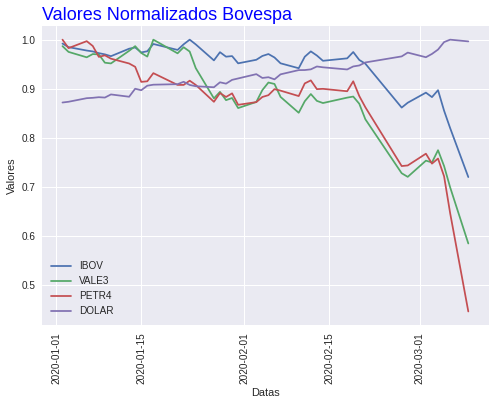

In [ ]:
for item in ['IBOV','VALE3','PETR4','DOLAR']:
  mystocksn[item] = mystocksn[item]/mystocksn[item].max() 
  sns.lineplot(x='data',y=item,data=mystocksn,label=item)

# Add legend
plt.legend(loc=3, ncol=1)
# Try Google: legend position in matplotlib 
 
# Add titles
plt.title('Valores Normalizados Bovespa', loc='left', fontsize=18, fontweight=0, color='blue')  # título

plt.xlabel('Datas')                           # x,y labels
plt.ylabel('Valores')

plt.xticks(rotation=90)                       # só para ajustar os labels
plt.show() 


### **Skip This. Análise de Tendência** & Agregação de Séries 
Lembra do outro dataframe de Ações? Veja a estrutura diferente dele. Os dados não estão *normalizados* e você para uma mesma data encontra mais de um valor para diferentes ações (*Stock*).  

In [ ]:
mystocksb.head(100)

,data,Stock,value
0,2020-01-02,IBOV,118573.00
1,2020-01-03,IBOV,117707.00
2,2020-01-06,IBOV,116878.00
3,2020-01-07,IBOV,116662.00
4,2020-01-08,IBOV,116247.00
...,...,...,...
95,2020-01-13,PETR4,15.48
96,2020-01-14,PETR4,15.37
97,2020-01-15,PETR4,14.87
98,2020-01-16,PETR4,14.89


Qual é o resultado então do plot de `value`?



```
sns.lineplot(x='data',y='value',data=mystocksb)
```



Veja que os valores das são então  "agregados". A linha destacada representa então o valor médio dos diferentes valores encontrados para uma mesma data.  

No handles with labels found to put in legend.


Text(0, 0.5, 'Pontos')

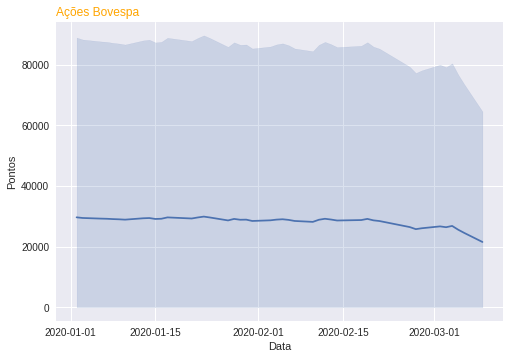

In [ ]:
sns.lineplot(x='data',y='value',data=mystocksb)
# sns.lineplot(x='data',y='value',data=mystocksb[mystocksb['Stock'].isin(['VALE3','PETR4','DOLAR'])])
# sns.lineplot(x='data',y='value',data=mystocksb[mystocksb['Stock'].isin(['VALE3','PETR4'])])

# Add legend
plt.legend(loc=3, ncol=1)
# Try Google: legend position in matplotlib 
 
# Add titles
plt.title("Ações Bovespa", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Data")
plt.ylabel("Pontos")


### **Classificação**, `sns.lineplot(x=x,y=y,hue,data=data)`

---


O pacote `seaborn` o parâmetro **hue** permite separar essas séries pelo valor de um atributo o que é útil para exibir **classificações** dos dados.   

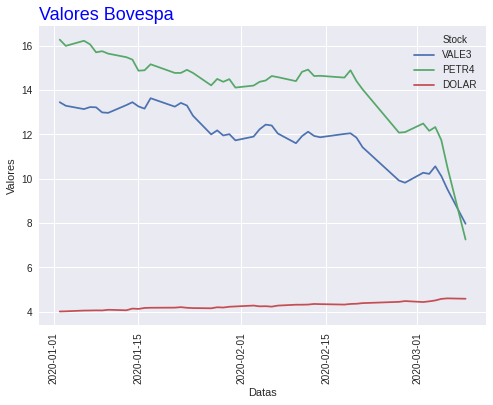

In [ ]:
# sns.lineplot(x='data',y='value',hue='Stock',data=mystocksb)
sns.lineplot(x='data',y='value',hue='Stock',data=mystocksb[mystocksb['Stock'] != 'IBOV'])

# Add titles
plt.title('Valores Bovespa', loc='left', fontsize=18, fontweight=0, color='blue')  # título

plt.xlabel('Datas')                           # x,y labels
plt.ylabel('Valores')

plt.xticks(rotation=90)                       # só para ajustar os labels
plt.show() 


### **Linha de Tendência**,`sns.lmplot(x,y,data)`
O gráfico `sns.lmplot` ajusta um modelo de regressão x ~ y aos pontos (x,y) resultando na linha de regressão e um intervalo de 95% de confiança.

No handles with labels found to put in legend.


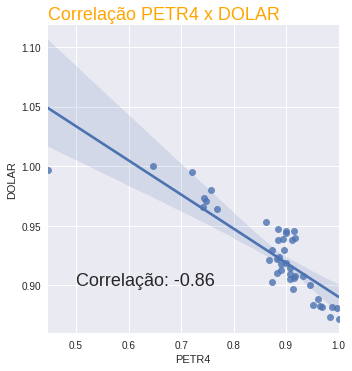

In [ ]:
sns.lmplot(x='PETR4',y='DOLAR',data=mystocksn)

# Add titles
plt.title("Correlação PETR4 x DOLAR", loc='left', fontsize=18, fontweight=0, color='orange')
plt.xlabel("PETR4")
plt.ylabel("DOLAR")

plt.legend()
plt.text(0.5,0.9,'Correlação: '+ str( round(mystocksn['PETR4'].corr(mystocksn['DOLAR']),2)  ), fontsize=18)

plt.show()

## **Caso 2 DISTRIBUIÇÃO e RANKING:** Como evolui e se relaciona o BMI e a Expectativa de Vida média com o grau de desenvolvimento dos Países? 

Os dados aqui são obtidos diretamente da **WHO World Health Organization** - Life expectancy and Healthy life expecancy.

**Aprenda** Gráficos de Distribuição (histogram e density plot) e de Barras, exiba Comparações e a Distribuição de valores.

## Obtenção e Preparação dos Dados 
### SKIP se você estiver estudando apenas a Visualização de Dados

Esse código mostra como os dados foram obtidos e preparados para você. O código, como exemplo, pode ser útil para seu projeto e a exploração e entendimento de outros dados. Mas se estiver apenas estudando a Visualização de Dados pule esta parte.    

In [ ]:
import warnings
warnings.filterwarnings('ignore')

WHO = pd.read_csv('https://meusite.mackenzie.br/rogerio/TIC/Life_Expectancy_Data.csv')
WHO.rename(columns={' BMI ':'BMI', 'Life expectancy ':'Life_expectancy'}, inplace=True)

# if (WHO.isnull().sum().sum() > 0):  
#    WHO = WHO.dropna()

WHO2010 = WHO[WHO['Year'] == 2010]
WHO2010.reset_index(inplace=True)
WHO2010 = WHO2010.drop(columns='index')

WHO2015 = WHO[(WHO['Country'].isin(['Brazil',
      'Portugal',
      'Argentina',
      'United States of America', 
      'Canada', 
      'Netherlands'])) & 
    (WHO['Year'] == 2015)]

WHO2015.reset_index(inplace=True)
WHO2015 = WHO2015.drop(columns='index')

### Explorando os Dados

Entenda aqui os dados disponíveis.

In [ ]:
WHO2015

,Country,Year,Status,Life_expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Argentina,2015,Developing,76.3,116.0,8,NaN,0.0,94.0,0,62.8,9,93.0,NaN,94.0,0.1,13467.12360,43417765.0,1.0,0.9,0.826,17.3
1,Brazil,2015,Developing,75.0,142.0,42,NaN,0.0,96.0,214,56.1,47,98.0,NaN,96.0,0.1,8757.26220,2596218.0,2.7,2.6,0.754,15.2
2,Canada,2015,Developing,82.2,64.0,2,NaN,0.0,55.0,195,67.0,2,91.0,NaN,91.0,0.1,43315.74400,3584861.0,0.6,0.5,0.919,16.3
3,Netherlands,2015,Developed,81.9,57.0,1,NaN,0.0,94.0,7,62.1,1,95.0,NaN,95.0,0.1,44292.88473,16939923.0,1.0,0.9,0.923,18.1
4,Portugal,2015,Developed,81.1,76.0,0,NaN,0.0,98.0,8,61.6,0,98.0,NaN,98.0,0.1,1922.68100,135876.0,0.7,0.5,0.841,16.6
5,United States of America,2015,Developed,79.3,13.0,23,NaN,0.0,92.0,188,69.6,26,93.0,NaN,95.0,0.1,NaN,NaN,0.8,0.6,NaN,NaN


### **histograma**, Como os valores se distribuem?, `sns.distplot(data.x)`

Você já deve ter notado que para análise de dados, na maior parte dos casos, é muito mais importante conhecer a distribuição de valores (o que pode ser obtido por um histograma ou um gráfico de densidade de probabilidade) que unicamente informações clássicas da estatística descritiva (média, desvio padrão etc.). 

O histograma é um gráfico de distribuição. Envolve os valores de uma única variável e a frequência (quantidade de ocorrências) desses valores.  

Abaixo a série de dados completa e somente para o ano de 2010 mostra a manutenção de uma ***distribuição bimodal*** indicando, possivelmente, dois grupos distintos de países. 

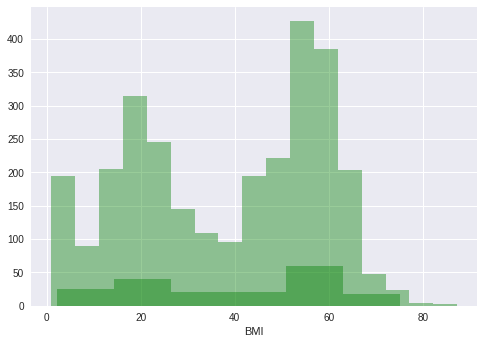

In [ ]:
sns.distplot(WHO.BMI, kde=False, color="g")
sns.distplot(WHO2010.BMI, kde=False, color="g")

plt.show()

Adicionando uma linha de **Kernel Density Estimation (KDE)** (a função de densidade de probabilidade a valores contínuos.

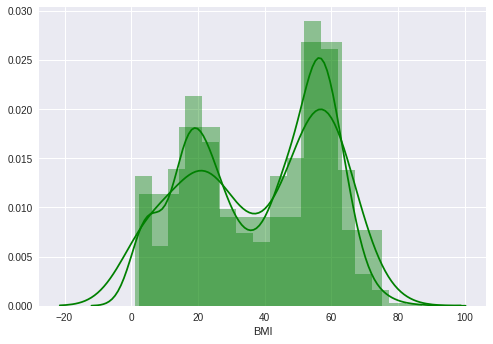

In [ ]:
sns.distplot(WHO.BMI, kde=True, color="g")
sns.distplot(WHO2010.BMI, kde=True, color="g")

plt.show()

Já a **Expectativa de Vida** apresenta uma **Distribuição** ligeiramente em **Calda à Esquerda**. 

**Distribuições diferentes**, como as do BMI e de Expectativa de Vida, são uma possível **indicação de que essas variáveis não são correlacionas**. Isto é, há valores de uma que não podem ser explicados diretamente pela outra.

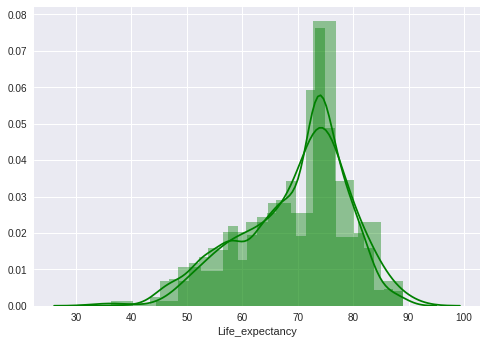

In [ ]:
sns.distplot(WHO.Life_expectancy, kde=True, color="g")
sns.distplot(WHO2010.Life_expectancy, kde=True, color="g")
plt.show()


### ***Bins***, alterando o range de valores do histograma

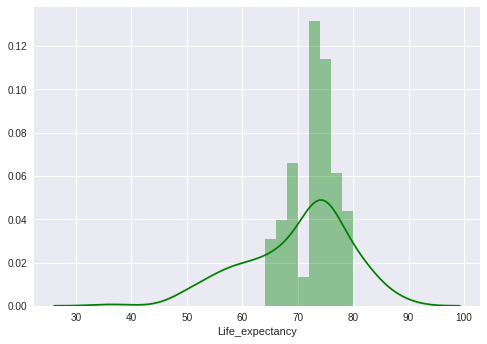

In [ ]:
sns.distplot(WHO2010.Life_expectancy,bins=[64,66,68,70,72,74,76,78,80],kde=True, color="g")
# ou
# sns.distplot(WHO2010.Life_expectancy,bins=list(range(0,80,10)),kde=True, color="g")

plt.show()


### **barplot**, `sns.barplot(x,y,data)`

Os **gráficos de barra** são bastante úteis na **comparação de valores entre instâncias, grupos ou classes diferentes**. Evite o erro comum de confundir um gráfico de barras com um histograma. Um gráfico de barras envolve duas ou mais valores, o valor de amplitude da barra (y) e o valor das classes ou categorias a que pertencem (x).

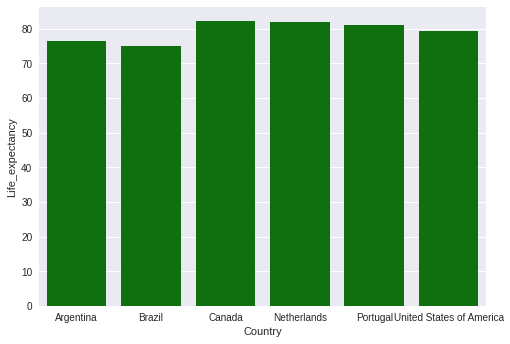

In [ ]:
sns.barplot(x='Country',y='Life_expectancy', color='g',data=WHO2015)
plt.show()


### Apontando classes das categorias... `sns.barplot(x,y,data,hue)` 

O parâmetro `hue` tem a mesma função que encontramos no `lineplot` antes e permite classificar as barras pelo valor de um dado atributo.

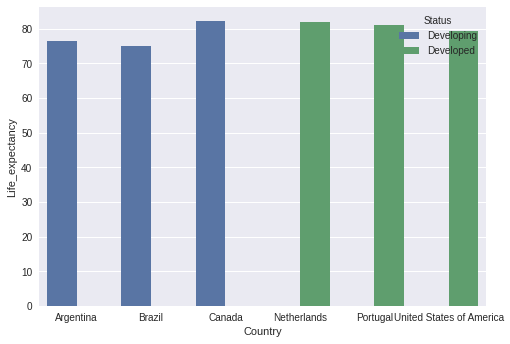

In [ ]:
sns.barplot(x='Country',y='Life_expectancy', hue='Status', data=WHO2015)
plt.show()


### Ooops! 
Podemos ajustar o intervalo da variável de interesse para destacar as diferenças de valores entre o grupo de países Desenvolvidos e em Desenvolvimento. O que colabora com a nossa análise.

**Nossa base indica como o Canada como um dos países em Desenvolvimento!  **. O **Entendimento dos Dados** envolve também a análise **Qualidade dos Dados** e isso pode ou não ser um erro dos dados. No momento, entretanto, não importará para nós os motivos pelos quais a WHO classifica nesta base o Canadá como país em Desenvolvimento e iremos manter desse modo.  

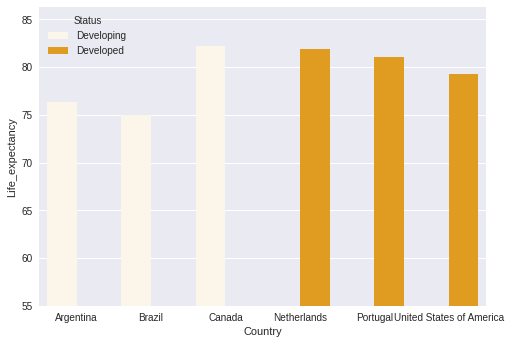

In [ ]:
g = sns.barplot(x='Country',y='Life_expectancy', hue='Status', color='orange',data=WHO2015)
g.set(ylim=(55, None))

plt.show()

### **SKIP THIS**. Comparando Séries de Dados

Os Gráficos de Barra também podem ser empregados para comparar Séries de Dados discretas no lugar de Gráficos de Linha. Na comparação de Séries o barplot fornece um **intervalo de confiança dos valores**. Compare as duas formas. 

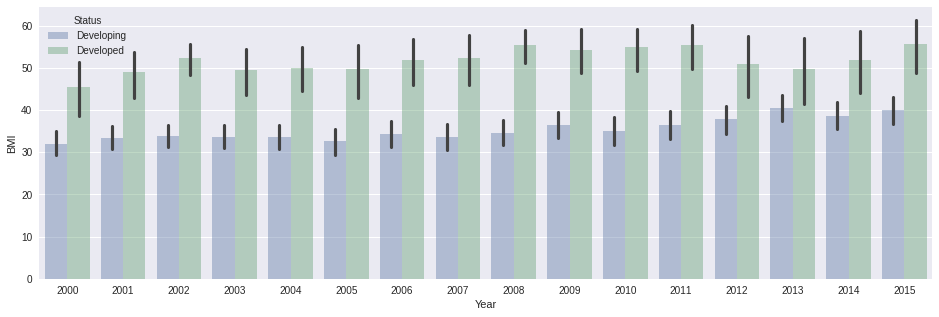

In [ ]:
plt.figure(figsize=(16,5))
sns.barplot(x='Year',y='BMI',hue='Status',data=WHO,alpha=0.4)
# sns.lineplot(x='Year',y='BMI',hue='Status',data=WHO,alpha=0.4)

plt.show()

### ***Boxplot***, Comparando Séries e ***Outliers***, `sns.boxplot(x,y,data,hue=hue)`

**John Tukey** introduziu o gráfico de Caixa em um conjunto de ferramentas para a análise exploratória de dados (**EDA**) em 1970 e ele tornou-se amplamente utilizado à partir do final da década de 70 (1977, com sua publicação). Ele é uma **forma mais compacta, embora como menos detalhes, de representar a distribuição de valores** que histogramas e gráficos de densidade.

Veja um uso prático na opção `Gráfico Completo` da página [Cotações do Ibovespa](https://br.tradingview.com/symbols/BMFBOVESPA-BOVA11/#)

Veja aqui uma representação gráfica dos *quartis* e *outliers*. 

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/220px-Boxplot_vs_PDF.svg.png' width=500 align="center"></a>

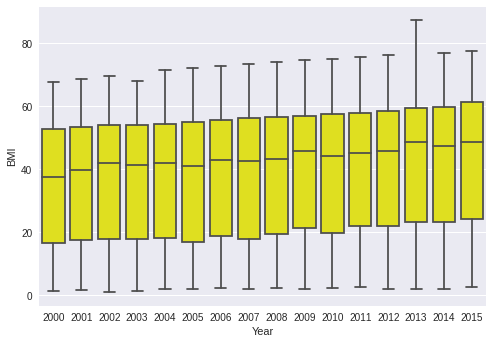

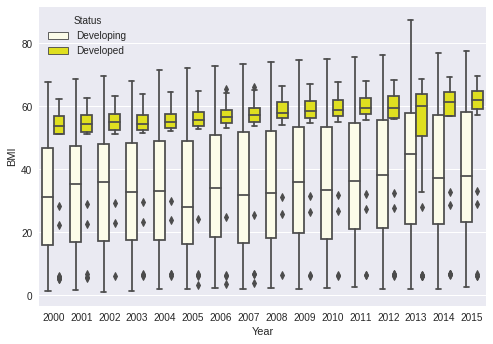

In [ ]:
sns.boxplot(x='Year',y='BMI',data=WHO[WHO.Year>=2000],color='yellow')
plt.show()

# SKIP THIS
# sns.boxplot(x='Year',y='BMI',hue='Status',data=WHO[WHO.Year>=2000],color='yellow')
# plt.show()


Você pode notar um aumento ao longo dos anos da Expectativa de Vida, mas também do BMI. Além disso **faixas mais largas** ao longo dos anos demostram um a**umento da desigualdade** desses fatores entre os países. 

### Boxplot, Comparando duas ou mais variáveis 

Como são descrições compactas da ditribuição das variáveis podemos empregar o boxplot também para analisar a relação entre duas ou mais variáveis. Aqui, claramente, BMI e Expectativa de Vida apresentam distribuições distintas.   

             variable  value
0                 BMI   19.1
1                 BMI   18.6
2                 BMI   18.1
3                 BMI   17.6
4                 BMI   17.2
...               ...    ...
2211  Life_expectancy   59.2
2212  Life_expectancy   58.0
2213  Life_expectancy   56.6
2214  Life_expectancy   54.9
2215  Life_expectancy   52.4

[2216 rows x 2 columns]


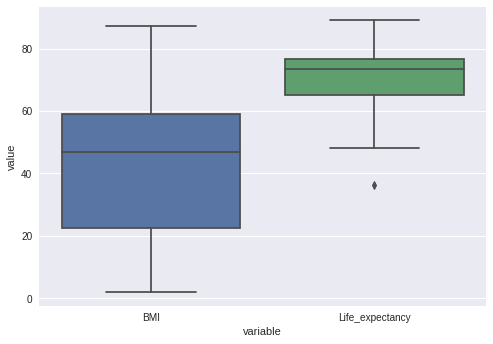

In [ ]:
data = pd.melt(WHO.loc[WHO.Year>=2010, ['BMI','Life_expectancy']])
print(data)
sns.boxplot(x='variable',y='value',data=data)
plt.show()


### **Clean Outliers**, `boxplot(x,y,data,showfliers=False)`

Na presença de muitos outliers a visualização dos dados pode ser prejudicada. 

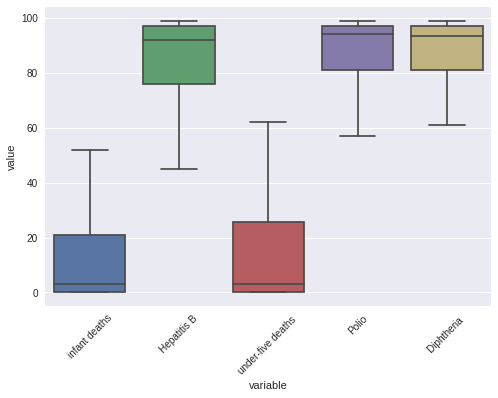

In [ ]:

# Try Google: seaborn boxplot without outliers

data = pd.melt(WHO.loc[WHO.Year==2010, [ 
       'infant deaths',  'Hepatitis B',
        'under-five deaths ', 'Polio', 
       'Diphtheria ' ]])
data

g = sns.boxplot(x='variable',y='value',data=data,showfliers=False)
plt.xticks(rotation=45)

plt.show()

### **SKIP This.** **Distribuição ou Correlação != Causalidade**

Os gráficos mostram uma dsitribuição bastante próxima das mortes ligas à doenças como Hepatite B, Polio e Difeteria. Entretanto isso não se deve a correlação das variáveis (encontram-se abaixo de 70%). Mesmo que você encontra-se correlação entre elas **a distribuição semelhante se deve não a uma relação causa-efeito, mas à causa comum dessas doenças**, a pobreza. 



### Measles outbreak

O Sarampo ainda causa muitas mortes no mundo. 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

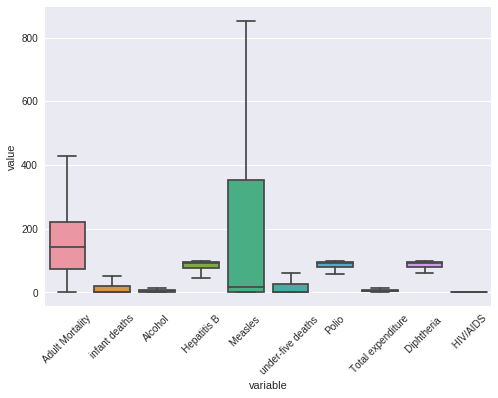

In [ ]:
data = pd.melt(WHO.loc[WHO.Year==2010, [ 'Adult Mortality',
       'infant deaths', 'Alcohol', 'Hepatitis B',
       'Measles ','under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS']])
data
g = sns.boxplot(x='variable',y='value',data=data,showfliers=False)
plt.xticks(rotation=45)

A redução de mortes foi ao longo dos anos muito efetiva com a adoção de Campanhas de Vacinação. Entretanto, na última década, a falta de efetividade dessas campanhas produziu aumento das mortes e da ameaça, mesmo em países desenvolvidos (ver https://www.cdc.gov/measles/cases-outbreaks.html).   

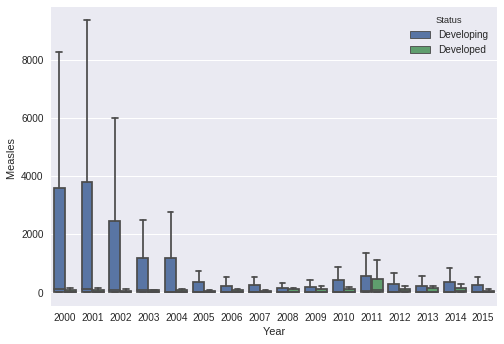

In [ ]:
sns.boxplot(x='Year',y='Measles ',data=WHO, hue='Status',showfliers=False)


## **Caso 3 CORRELAÇÃO:** Que características tornam um **Pokemon** mais apto a vender as batalhas? 

Embora possa parecer um conjunto de dados de brinquedo esses são dados reais dos jogos Pokemon (https://www.kaggle.com/abcsds/pokemon). Além disso esses dados trazem uma série de similiaridades com problemas reais em que uma série de **features** de produtos, clientes, equipamentos e ou sensores produzem dados que precisam ter seus relacionamentos analisados.  

**Aprenda** A entender e explorar os dados visualmente. Entenda o **gráfico de dispersão** (`scatterplot`) e como empregar este e um **mapa de calor** para encontrar variáveis correlacionadas. 

### Obtenção dos Dados 

In [ ]:
pokemon = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/Pokemon.csv',index_col=0)
pokemon

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True


## Entendendo os Dados Visualmente

Agora que você já aprendeu alguns gráficos você pode passar a usá-los para conhecer mais o seu conjunto de dados. Aproveito para apresentar mais alguns outros gráficos úteis.   

### Contando os Dados diferentes valores,  `data.plot(kind='pie')` e `sns.countplot(x, data=data)`

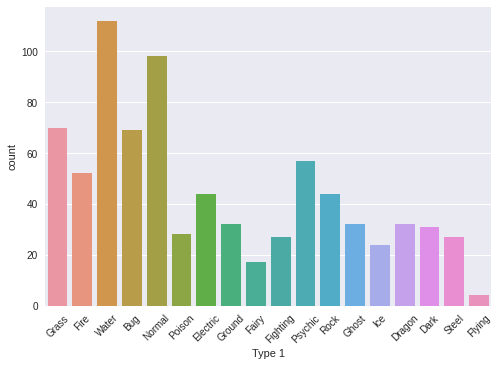

In [ ]:
# pokemon['Generation'].value_counts().plot(kind='pie') 
g= sns.countplot(x='Type 1', data=pokemon)
plt.xticks(rotation=45)

plt.show()


### Verificando a Distribuição dos Dados, `sns.displot(x)`



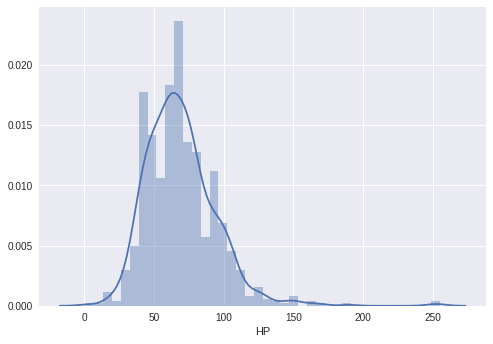

In [ ]:
# sns.distplot(pokemon.Speed) 
sns.distplot(pokemon.HP) 
plt.show()


### Ranking de Valores,  `sns.barplot(x,y,data)`

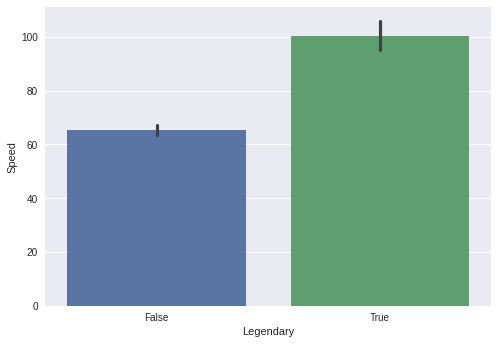

In [ ]:
sns.barplot(x='Legendary',y='Speed',data=pokemon)
plt.show()



### **Mapa de Calor**: Identificando Visualmente Maiores e Menores Valores, `heatmap(data)` 

A ideia dos Mapas de Calor é permitirem identificar maiores e menores valores visualmente. 

Observe o gráfico abaixo e tente responder:

1. Qual característica dos Pokemons apresenta menos variação?  
2. Que classe de Pokemon apresenta características com menos variabilidade? 

**Note**: *Essas mesmas perguntas para Pokemons poderia ser feita para as características e classes de clientes, produtos e equipamentos.*

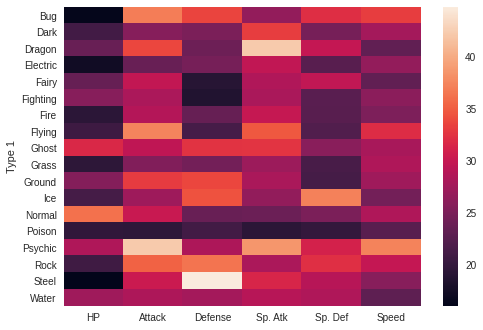

In [ ]:
data = pokemon.groupby('Type 1')['HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed'].std()
sns.heatmap(data)

plt.show()


###  Gráficos de Dispersão, `sns.scatterplot(x,y,data)`


Obviamente você sempre pode fazer um gráfico (x,y). Mas é importante lembrar que embora sejam valores x e y esse gráfico não é necessariamente de uma função (*por que?*). 

Não sendo uma função esse gráfico é conhecido como **gráfico de dispersão**. Seu objetivo é mostrar como os valores de uma varuiável estão distribuídos com relação à outra (*dispersos*). 

Note que algumas variáveis apresentam formas mais concentradas de dispersão, outras menos, formas mais lineares ou menos e assim por diante. Isso exibe a relação entre os dados.     



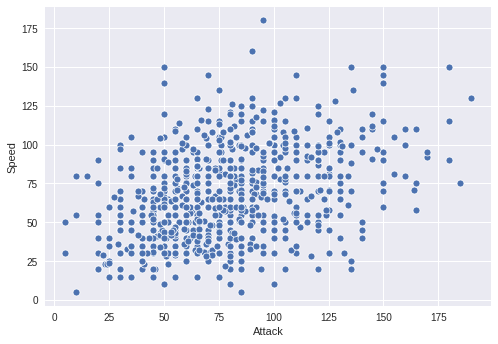

In [ ]:
# sns.scatterplot(x='Attack', y='Defense', data=pokemon)
sns.scatterplot(x='Attack', y='Speed', data=pokemon)

plt.show()



### Gráficos Múltiplos Dispersão, `sns.pairplot(x,y,data,hue)` 

O `pairplot` permite exibir simultaneamente vários Gráficos de Dispersão e assim buscarmos variáveis com relações de interesse.

Observe o gráfico abaixo e tente responder:

1. Que par de variáveis parece apresentar maior **correlação linear**? 



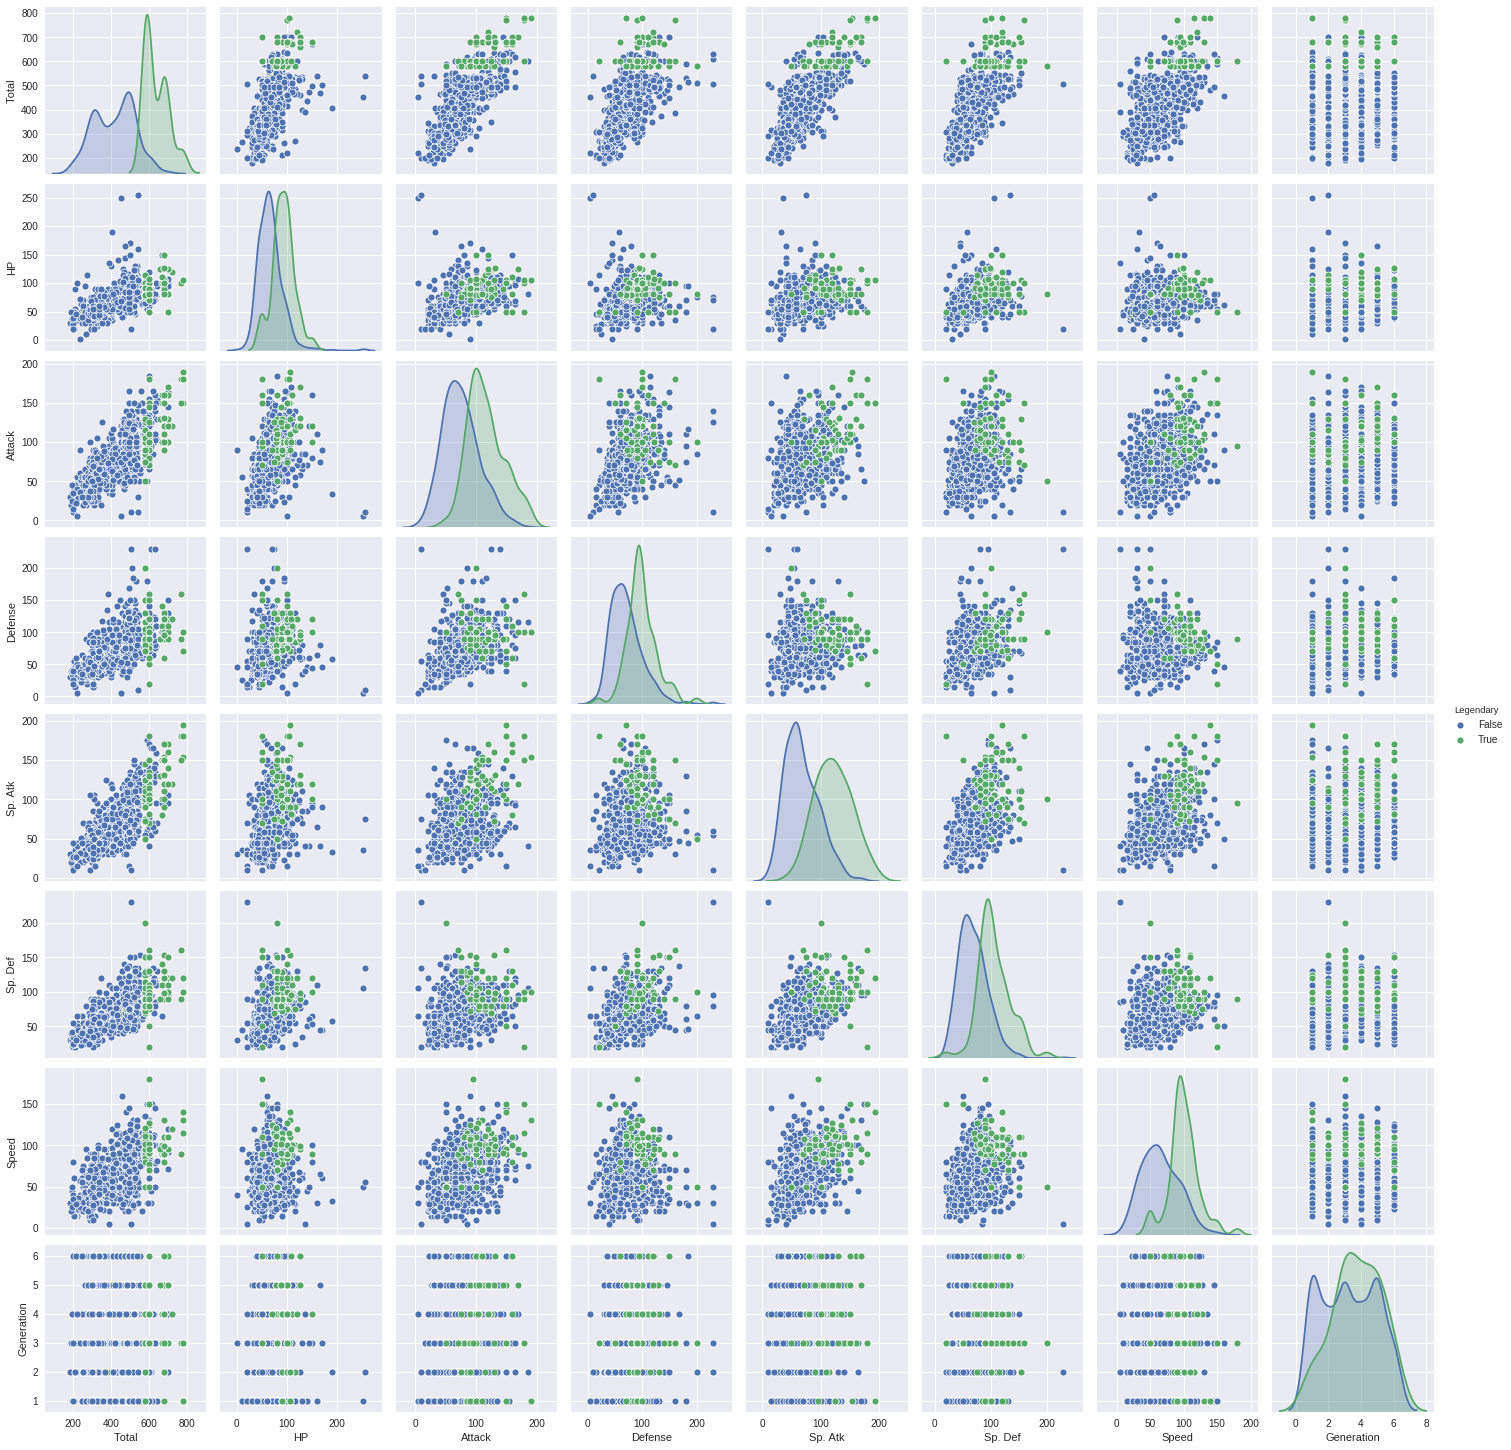

In [ ]:
# sns.scatterplot(x='Attack', y='Defense', data=pokemon)
sns.pairplot(data=pokemon,hue='Legendary')

plt.show()



### Regressão Linear, `sns.lmplot(x,y,data)` 

Vamos supor que apenas observando você tenha escolhido os atributos `HP`e `Total`. Você pode então analisar graficamente essa relação.

No handles with labels found to put in legend.


Text(200, 200, 'Correlação: 0.62')

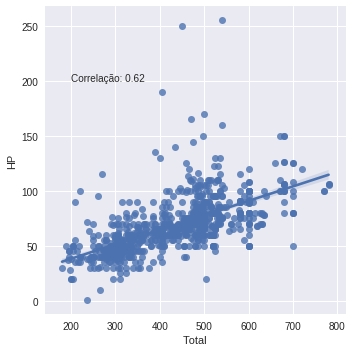

In [ ]:
sns.lmplot(x='Total',y='HP',data=pokemon)
plt.legend()
plt.text(200,200,'Correlação: '+ str( round(pokemon.Total.corr(pokemon.HP),2)  ))

plt.show()


### Matriz de Correlação, `sns.heatmap(corr)` 

Mas uma forma melhor para investigar isso é analisar uma matriz de correlação.

Note: Essa é uma matriz que busca correlações lineares entre os dados. Muitas vezes, entretanto, existem outras relações entre os dados e que podem ser até mesmo de maior interesse.    

              Total        HP    Attack  ...   Sp. Def     Speed  Legendary
Total      1.000000  0.618748  0.736211  ...  0.717609  0.575943   0.501758
HP         0.618748  1.000000  0.422386  ...  0.378718  0.175952   0.273620
Attack     0.736211  0.422386  1.000000  ...  0.263990  0.381240   0.345408
Defense    0.612787  0.239622  0.438687  ...  0.510747  0.015227   0.246377
Sp. Atk    0.747250  0.362380  0.396362  ...  0.506121  0.473018   0.448907
Sp. Def    0.717609  0.378718  0.263990  ...  1.000000  0.259133   0.363937
Speed      0.575943  0.175952  0.381240  ...  0.259133  1.000000   0.326715
Legendary  0.501758  0.273620  0.345408  ...  0.363937  0.326715   1.000000

[8 rows x 8 columns]


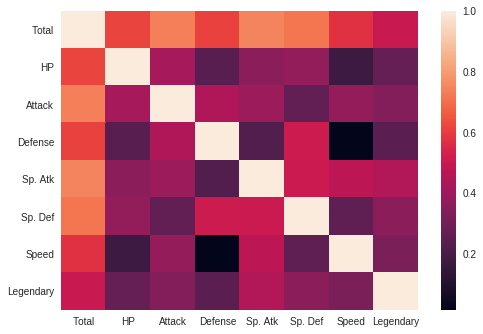

In [ ]:
corr = pokemon[['Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Legendary']].corr()
print(corr)

sns.heatmap(corr)
plt.show()


Observando esse novo gráfico:

1. Que par de variáveis parece apresentar maior **correlação linear**? 

No handles with labels found to put in legend.


Text(200, 150, 'Correlação: 0.75')

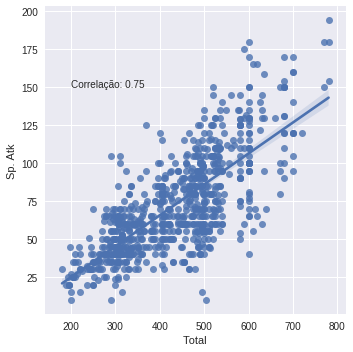

In [ ]:
sns.lmplot(x='Total',y='Sp. Atk',data=pokemon)
plt.legend()
plt.text(200,150,'Correlação: '+ str( round(pokemon.Total.corr(pokemon['Sp. Atk']),2)  ))

### **Skip This.** Distribuição de Densidade 2D, `sns.jointplot(x, y, data=, kind="kde")` 

Do ponto de vista de uma relação linear o atributo `Sp. Atk` é o que melhor explica a variável `Total`. Mas essa relação não é exatamente linear e talvez um gráfico como esse permita identificar outras relações. 

Consegue identificar dois grupos diferentes diferentes de Pokemons? Sim, poderiam ser clientes ou equipamentos. 

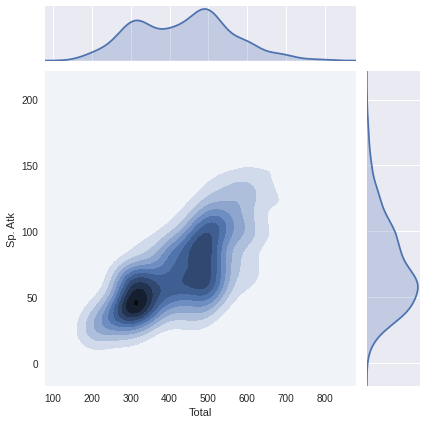

In [ ]:
sns.jointplot(x='Total', y='Sp. Atk', data=pokemon, kind="kde")

plt.show()


## Conclusões

1. A **Visualização dos Dados** é uma parte importante da Análise dos Dados. Ela permite encontrar relações que podem não ser obtidas de outros modos.
2. **Comece pela Pergunta.** O quê você quer buscar nos dados? Você pode então buscar o gráfico adequado para responder a sua pergunta. As principais perguntas envolvem a ***evolução, distribuição, ranking e correlação dos dados***.  
3. **Refine sua Resposta**. O gráfico pode ser refinado e trazer outros *insights* sobre os dados para os quais novas perguntas podem ser feitas.  
3. Lembre-se, a **correlações** são importantes mas **não implicam em causalidade**. Além disso existem muitas **correlações não lineares** importantes sobre os dados. 
3. Atenção aos tipos de dados: **Dados Categórios e Numéricos** têm tratamentos bastante diferentes. Formatos de **data-hora (dd,mm,yy,hh) são bastante complexos** de lidar. Séries numéricas assim como Textos (dados categóricos) constituem capítulos bastante especializados da Análise de Dados. 
4. Existem muitos outros gráficos que não exploramos aqui. Muitos são de uso para problemas específicos como gráficos espaciais e redes. Consulte as bibliotecas disponíveis do mesmo modo que este material serve de guia para os gráficos que tratamos.




<h1 align=left><font size = 6, style="color:rgb(200,0,0)">Exercícios</font></h1>
<hr>

# Basic imports



In [ ]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
# %matplotlib inline
get_ipython().run_line_magic('matplotlib', 'inline')

import seaborn as sns

# opcional
mpl.style.use(['seaborn']) # tente ggplot e seaborn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Exercício 1 (**RESOLVIDO**)

Empregue o dataset `dots`. Quanto aproximadamente dura o miliar de disparo de um neurônio (tipo = choice 'T2' e align 'dots'). O limiar de disparo é do menor valor para o maior.

    align choice  time  coherence  firing_rate
194  dots     T2   -80        0.0    34.970107
195  dots     T2   -80        3.2    36.785815
196  dots     T2   -80        6.4    34.478506
197  dots     T2   -80       12.8    34.991424
198  dots     T2   -80       25.6    32.241533


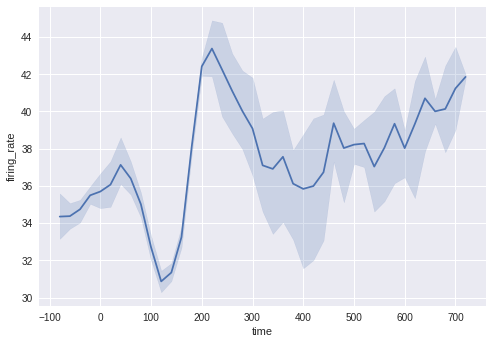

In [ ]:
df = sns.load_dataset('dots')
df = df[(df.choice == 'T2') & (df['align'] == 'dots')]
print(df.head())

sns.lineplot(df.time, df.firing_rate)
plt.show()

## Exercício 2 

Empregue o dataset `mpg`. Qual a origem dos veículos mais econômicos? 

In [ ]:
# Seu código

## Exercício 3 (**RESOLVIDO**)

Empregue o dataset `mpg`. Os carros são mais potentes nos anos 70 ou nos anos 80? 

    mpg  cylinders  displacement  ...  model_year  origin                       name
0  18.0          8         307.0  ...          70     usa  chevrolet chevelle malibu
1  15.0          8         350.0  ...          70     usa          buick skylark 320
2  18.0          8         318.0  ...          70     usa         plymouth satellite
3  16.0          8         304.0  ...          70     usa              amc rebel sst
4  17.0          8         302.0  ...          70     usa                ford torino

[5 rows x 9 columns]


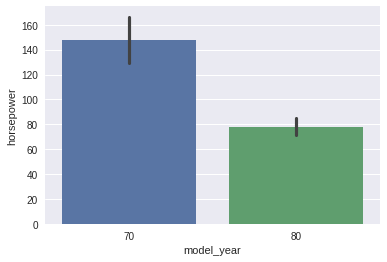

In [ ]:
df = sns.load_dataset('mpg')
print(df.head())
sns.barplot(df[(df.model_year == 70) | (df.model_year == 80)].model_year,df.horsepower)

## Exercício 4
Empregue o dataset abaixo. Que relação aparece mais evidente para o tamanho da população, o preço médio das casas ou o total de cômodos?

In [ ]:
# Seu código


## Exercício 5

Leia o dataset `pd.read_csv('/content/sample_data/california_housing_train.csv')`. Que tipo de distribuição os dados de população seguem?




In [ ]:
# Seu código

## Exercício 6

Empregue o dataset `sns.load_dataset('car_crashes')`. Compare os valores totais de acidentes para os estados de AL, CA e DC. Qual apresenta maior número de acidentes?  

In [ ]:
# Seu código

## Exercício 7

Empregue o dataset `sns.load_dataset('geyser')`. 

1. Existe relação entre as variáveis `duration` e `waiting`? 
2. Em qual dos tipos de geyser `duration` parece ter um impacto maior sobre o  `waiting`? 

In [ ]:
# Seu código

## Exercício 8

Empregue o dataset `sns.load_dataset('diamonds')`. 

1. Que cor de diamantes apresenta preços maiores? 
2. Existe diferença na oferta de diamantes com relação aos preços, entre os tipos de corte 'Premium' e 'Good'? (pense na distribuição dos dados)


In [ ]:
# Seu código

## Exercício 9

Empregue o dataset `sns.load_dataset('penguins')`. Que espécie de peguim apresenta maiores pesos? (estamos trabalhando com coleções em muitos casos vamos empregar para a mesma pergunta: Que espécie de peguim apresenta maior peso?)

In [ ]:
# Seu código

## Exercício 10

Leia o dataset `pd.read_csv('/content/sample_data/california_housing_train.csv')`.

1. Qual o preço mais frequente das casas? (note, dados reais podem conter erros, reflita sobre o gráfico antes de responder)


In [ ]:
# Seu código

